# CITS4403: Computational Modelling - Group Project
## Corona Virus Outbreak - Dataset from Kaggle
### By Jayden Kur, 21988713
### Roarke, 21742366
### Andrew, 22246801

In [601]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

#from utils import decorate, savefig

# I set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

# TODO: remove this when NetworkX is fixed
from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)

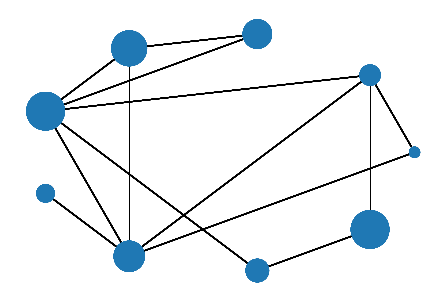

In [602]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')
import networkx as nx
import random

# Graph initialization
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9])
G.add_edges_from([(1,2), (3,4), (2,5), (4,5), (6,7), (8,9), (4,7), (1,7), (3,5), (2,7), (5,8), (2,9), (5,7)])
colors = ['r', 'b', 'g', 'y', 'w', 'm']
sizes = [100,400,800,1200,1400,300,900,500,1400]
# Animation function
def animate(i):
    nx.draw_circular(G, node_size=[sizes[j] for j in range(9)])
    #nx.draw_circular(G, node_color=[random.choice(colors) for j in range(9)])

#nx.draw_circular(G)
fig = plt.figure()

# Animator call
anim = FuncAnimation(fig, animate, frames=20, interval=200, repeat=True)
anim.save('test.gif', writer='imagemagick')

Reads in data from csv file

In [603]:
import pandas as pd
df = pd.read_csv("PatientInfo.csv", usecols = ['patient_id','sex','age','city','confirmed_date'])

In [604]:
df.head()

,patient_id,sex,age,city,confirmed_date
0,1000000001,male,50s,Gangseo-gu,23/1/20
1,1000000002,male,30s,Jungnang-gu,30/1/20
2,1000000003,male,50s,Jongno-gu,30/1/20
3,1000000004,male,20s,Mapo-gu,30/1/20
4,1000000005,female,20s,Seongbuk-gu,31/1/20


In [605]:
#Use patient_id as the index
df = df.set_index('patient_id')

In [606]:
df.head()

,sex,age,city,confirmed_date
patient_id,,,,
1000000001,male,50s,Gangseo-gu,23/1/20
1000000002,male,30s,Jungnang-gu,30/1/20
1000000003,male,50s,Jongno-gu,30/1/20
1000000004,male,20s,Mapo-gu,30/1/20
1000000005,female,20s,Seongbuk-gu,31/1/20


In [607]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2771 entries, 1000000001 to 7000000009
Data columns (total 4 columns):
sex               2765 non-null object
age               2758 non-null object
city              2703 non-null object
confirmed_date    2771 non-null object
dtypes: object(4)
memory usage: 108.2+ KB


In [608]:
#Drop any row with null value
df = df.dropna(how='any',axis=0);
#Drop any row with 'city' = etc
df = df[~df.city.str.contains("etc")];

# Korea City info - https://www.kaggle.com/kimjihoo/coronavirusdataset/discussion/132763

In [609]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 1000000001 to 7000000009
Data columns (total 4 columns):
sex               2655 non-null object
age               2655 non-null object
city              2655 non-null object
confirmed_date    2655 non-null object
dtypes: object(4)
memory usage: 103.7+ KB


In [610]:
temp = df.city.unique()

In [611]:
len(df.city.unique())

138

In [612]:
temp.sort()

In [613]:
temp

array(['Andong-si', 'Ansan-si', 'Anseong-si', 'Anyang-si', 'Asan-si',
       'Bonghwa-gun', 'Bucheon-si', 'Buk-gu', 'Bupyeong-gu',
       'Busanjin-gu', 'Buyeo-gun', 'Changnyeong-gun', 'Changwon-si',
       'Cheonan-si', 'Cheongdo-gun', 'Cheongju-si', 'Cheongsong-gun',
       'Chilgok-gun', 'Chuncheon-si', 'Chungju-si', 'Daedeok-gu',
       'Dalseo-gu', 'Dalseong-gun', 'Danyang-gun', 'Dobong-gu', 'Dong-gu',
       'Dongdaemun-gu', 'Dongjak-gu', 'Dongnae-gu', 'Eumseong-gun',
       'Eunpyeong-gu', 'Gangbuk-gu', 'Gangdong-gu', 'Gangnam-gu',
       'Gangneung-si', 'Gangseo-gu', 'Geochang-gun', 'Geoje-si',
       'Geumcheon-gu', 'Geumjeong-gu', 'Gijang-gun', 'Gimcheon-si',
       'Gimhae-si', 'Gimje-si', 'Gimpo-si', 'Goesan-gun', 'Goryeong-gun',
       'Goseong-gun', 'Goyang-si', 'Gumi-si', 'Gunpo-si', 'Gunsan-si',
       'Guri-si', 'Guro-gu', 'Gwacheon-si', 'Gwanak-gu', 'Gwangjin-gu',
       'Gwangju-si', 'Gwangmyeong-si', 'Gwangyang-si', 'Gyeongju-si',
       'Gyeongsan-si', 'Gyeryong-si

In [614]:
df.confirmed_date.unique()

array(['23/1/20', '30/1/20', '31/1/20', '5/2/20', '6/2/20', '16/2/20',
       '19/2/20', '20/2/20', '21/2/20', '22/2/20', '23/2/20', '26/2/20',
       '24/2/20', '25/2/20', '27/2/20', '28/2/20', '29/2/20', '1/3/20',
       '2/3/20', '4/3/20', '5/3/20', '6/3/20', '7/3/20', '8/3/20',
       '9/3/20', '10/3/20', '11/3/20', '12/3/20', '13/3/20', '14/3/20',
       '15/3/20', '16/3/20', '17/3/20', '18/3/20', '19/3/20', '20/3/20',
       '21/3/20', '22/3/20', '23/3/20', '24/3/20', '25/3/20', '26/3/20',
       '27/3/20', '28/3/20', '29/3/20', '3/3/20', '18/2/20', '26/1/20',
       '27/1/20', '1/2/20', '2/2/20', '9/2/20', '10/2/20', '30/3/20'],
      dtype=object)

In [615]:
len(df.confirmed_date.unique())

54

In [616]:
#df

In [617]:
df['confirmed_date'] = pd.to_datetime(df['confirmed_date'], format='%d/%m/%y').dt.strftime('%m%d')

In [618]:
#df

In [619]:
unique_cities = temp

In [620]:
graph = nx.Graph()
for city in unique_cities:
    graph.add_node(city)

In [621]:
node_names = df['city'].value_counts().index.to_list()
node_sizes = df['city'].value_counts().to_list()
#node_combined = [node_names[ii]+' '+str(node_sizes[ii]) for ii in range(len(node_names))]
labels = {}
for name,size in zip(node_names,node_sizes):
    labels[name] = name+ '\n' +str(size)

In [622]:
labels

{'Gyeongsan-si': 'Gyeongsan-si\n614',
 'Seongnam-si': 'Seongnam-si\n109',
 'Cheonan-si': 'Cheonan-si\n102',
 'Bonghwa-gun': 'Bonghwa-gun\n70',
 'Bucheon-si': 'Bucheon-si\n67',
 'Gumi-si': 'Gumi-si\n64',
 'Yongin-si': 'Yongin-si\n52',
 'Chilgok-gun': 'Chilgok-gun\n50',
 'Pohang-si': 'Pohang-si\n50',
 'Andong-si': 'Andong-si\n49',
 'Sejong': 'Sejong\n46',
 'Gyeongju-si': 'Gyeongju-si\n44',
 'Cheongdo-gun': 'Cheongdo-gun\n43',
 'Uiseong-gun': 'Uiseong-gun\n41',
 'Gangnam-gu': 'Gangnam-gu\n38',
 'Suwon-si': 'Suwon-si\n37',
 'Yeongcheon-si': 'Yeongcheon-si\n36',
 'Dongnae-gu': 'Dongnae-gu\n32',
 'Guro-gu': 'Guro-gu\n30',
 'Nam-gu': 'Nam-gu\n28',
 'Changwon-si': 'Changwon-si\n26',
 'Dongdaemun-gu': 'Dongdaemun-gu\n26',
 'Seo-gu': 'Seo-gu\n25',
 'Gimcheon-si': 'Gimcheon-si\n25',
 'Gangseo-gu': 'Gangseo-gu\n25',
 'Gwanak-gu': 'Gwanak-gu\n24',
 'Songpa-gu': 'Songpa-gu\n24',
 'Gunpo-si': 'Gunpo-si\n24',
 'Seongju-gun': 'Seongju-gun\n22',
 'Seocho-gu': 'Seocho-gu\n21',
 'Dongjak-gu': 'Dongjak-gu\

In [623]:
node_list = [node_names,node_sizes]

In [624]:
node_list[0][0]

'Gyeongsan-si'

In [625]:
node_list[1][0]

614

In [626]:
node_size = [50*node_list[1][ii] for ii in range(len(node_names))] # MADE THIS 50 * COUNT as the values were too small to see

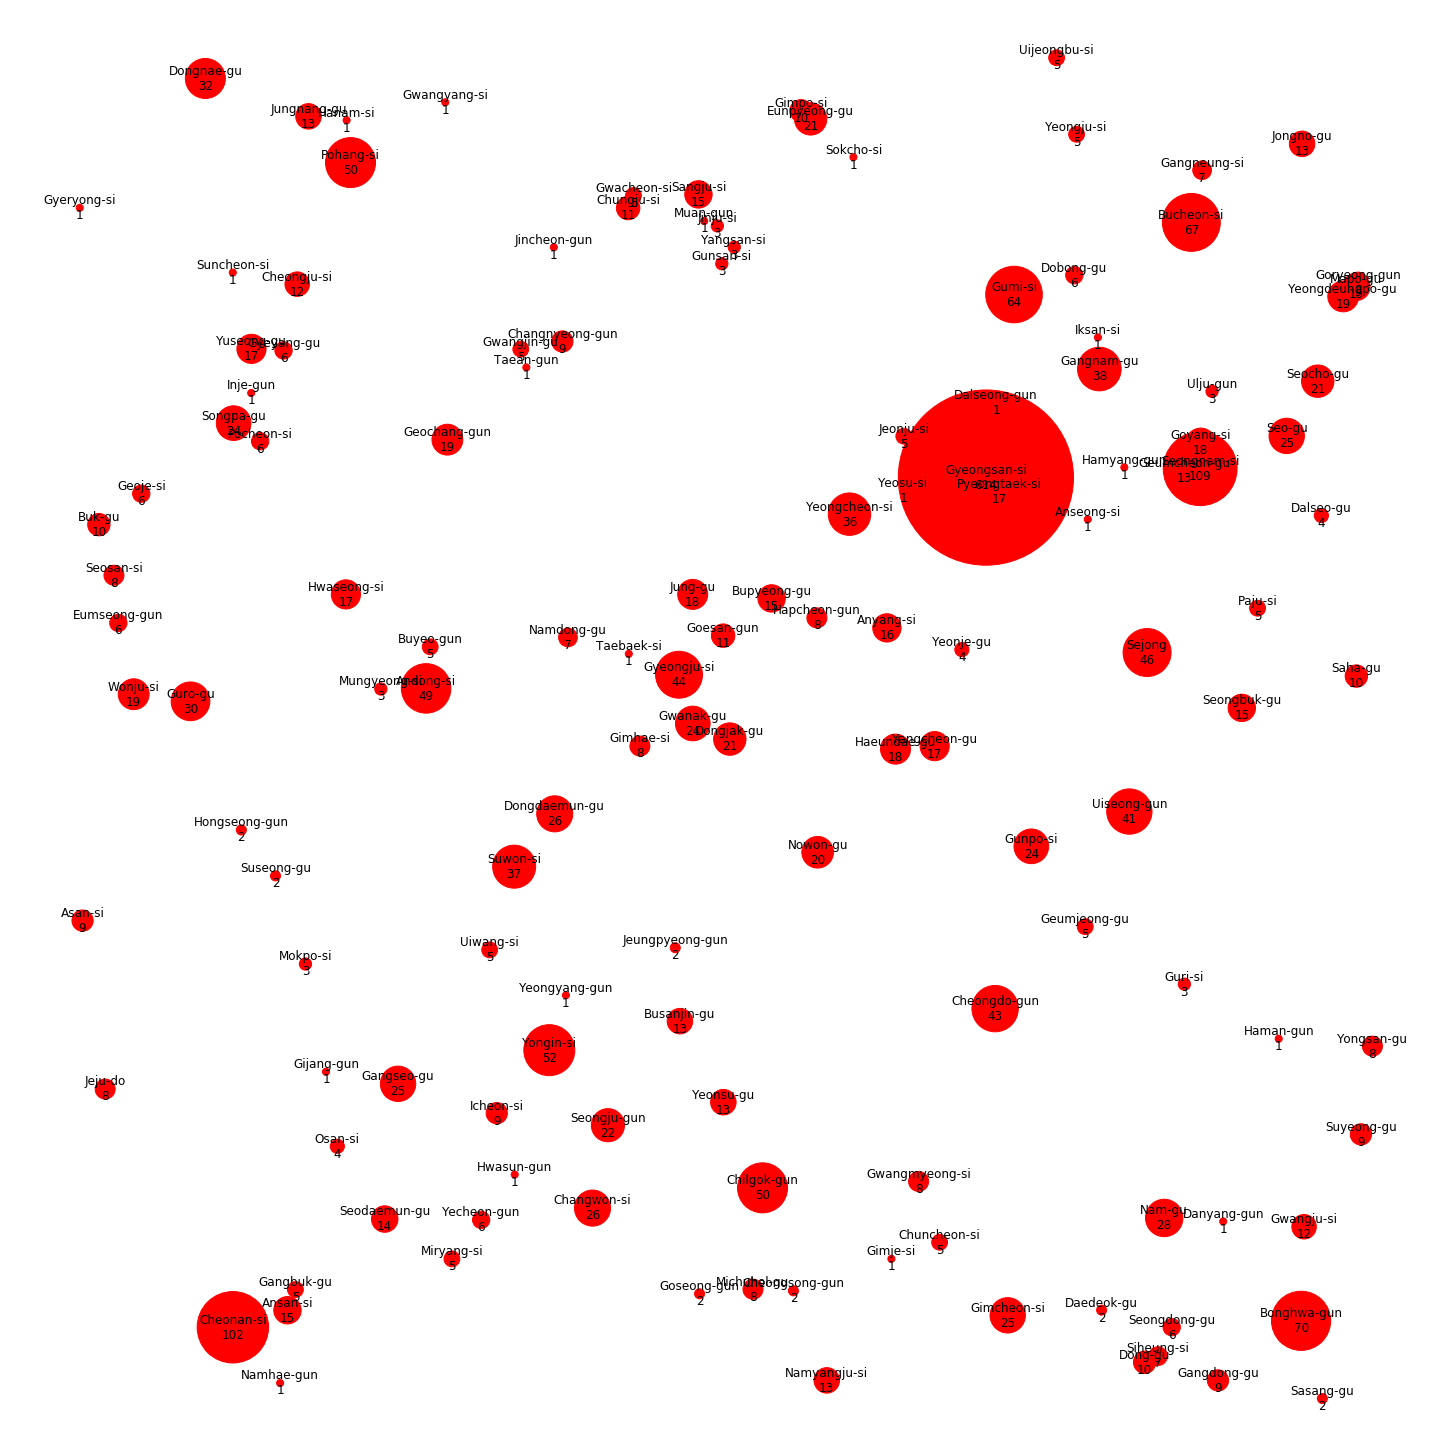

In [627]:
pos = nx.random_layout(graph)
plt.figure(1,figsize=(20,20)) 
nx.draw(graph,pos,nodelist=node_names,node_size=node_size,node_color='red',labels=labels,with_labels=True)
plt.axis('equal')
plt.show()

In [628]:
for ii in range(len(node_names)):
    attrs = {node_list[0][ii]: {'Cases': node_list[1][ii]}}
    nx.set_node_attributes(graph, attrs)
graph.nodes['Gyeongsan-si']['Cases']

614

In [629]:
new_df = df.set_index('city')

In [630]:
new_sort_df = new_df['sex'].sort_index()

In [631]:
for ii in range(len(new_sort_df)):
    index_city = new_sort_df.index[ii]
    try:
        males = new_sort_df[index_city].value_counts()['male']
    except:
        males = 0
    try:
        females = new_sort_df[index_city].value_counts()['female']
    except:
        females = 0
    attrs = {index_city: {'Males': males, 'Females': females, 'Age Groups': 1}}
    nx.set_node_attributes(graph, attrs)

In [641]:
new_sort_df = new_df['age'].sort_index()

In [650]:
for ii in range(len(new_sort_df)):
    index_city = new_sort_df.index[ii]
    try:
        zeroes = new_sort_df[index_city].value_counts()['0s']
    except:
        zeroes = 0
    try:
        tens = new_sort_df[index_city].value_counts()['10s']
    except:
        tens = 0
    try:
        twenties = new_sort_df[index_city].value_counts()['20s']
    except:
        twenties = 0
    try:
        thirties = new_sort_df[index_city].value_counts()['30s']
    except:
        thirties = 0
    try:
        fourties = new_sort_df[index_city].value_counts()['40s']
    except:
        fourties = 0
    try:
        fifties = new_sort_df[index_city].value_counts()['50s']
    except:
        fifties = 0
    try:
        sixties = new_sort_df[index_city].value_counts()['60s']
    except:
        sixties = 0
    try:
        seventies = new_sort_df[index_city].value_counts()['70s']
    except:
        seventies = 0
    try:
        eighties = new_sort_df[index_city].value_counts()['80s']
    except:
        eighties = 0
    try:
        nineties = new_sort_df[index_city].value_counts()['90s']
    except:
        nineties = 0
    #attrs = {index_city: {'Age Groups': [zeroes,tens,twenties,thirties,fourties,fifties,sixties,seventies,eighties,nineties]}}
    attrs = {index_city: {'Age Groups': {'0s':zeroes,'10s':tens,'20s':twenties,'30s':thirties,'40s':fourties,'50s':fifties,'60s':sixties,'70s':seventies,'80s':eighties,'90s':nineties}}}
    nx.set_node_attributes(graph, attrs)

In [652]:
print(graph.nodes['Gyeongsan-si']['Age Groups']['10s'])
print(graph.nodes['Jungnang-gu'])
print(graph.nodes['Seongbuk-gu'])

24
{'Cases': 13, 'Males': 8, 'Females': 5, 'Age Groups': {'0s': 0, '10s': 1, '20s': 6, '30s': 2, '40s': 2, '50s': 1, '60s': 1, '70s': 0, '80s': 0, '90s': 0}}
{'Cases': 15, 'Males': 6, 'Females': 9, 'Age Groups': {'0s': 0, '10s': 0, '20s': 6, '30s': 2, '40s': 1, '50s': 4, '60s': 2, '70s': 0, '80s': 0, '90s': 0}}


In [635]:
#attrs = {node_list[0][0]: {'Cases': 20, 'Males': 1, 'Females': 1, 'Age Groups': 1}}
#nx.set_node_attributes(G, attrs)
#G.nodes[0]['Cases']
#nx.draw(G)